In [18]:
%matplotlib qt

In [19]:
%matplotlib notebook #if using qt, do not use this one

In [3]:
import sys
print(sys.executable)  # Should point to your virtual environment's Python
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

C:\Users\reeya\EEG-ExPy\venv\Scripts\python.exe


In [ ]:
import numpy as np

In [4]:
from eegnb.datasets.datasets import fetch_dataset

In [1]:
import sys
import os
from pathlib import Path

# Navigate up from the notebook's directory to the project root
project_root = Path(os.getcwd()).resolve().parent.parent  # Up to `EEG-ExPy`
sys.path.append(str(project_root))

import gdown  # Should now work

In [5]:
data_dir = '../data'  # or anywhere you'd like the data to download to
experiment = 'visual-N170'
subject_list = [1]  # or 'all' for everything

# Download and get list of .csv files
file_paths = fetch_dataset(data_dir=data_dir, experiment=experiment, subjects=subject_list)


Downloading...
From (original): https://drive.google.com/uc?id=1oStfxzEqf36R5d-2Auyw4DLnPj9E_FAH
From (redirected): https://drive.google.com/uc?id=1oStfxzEqf36R5d-2Auyw4DLnPj9E_FAH&confirm=t&uuid=d56dcd58-994c-45a9-a7ba-7d624cb9adca
To: C:\Users\reeya\EEG-ExPy\examples\data\downloaded_data.zip
100%|████████████████████████████| 33.1M/33.1M [00:00<00:00, 52.6MB/s]


In [6]:
print(f"Found {len(file_paths)} files:")
print(file_paths[:3])  # Print the first few

Found 0 files:
[]


In [7]:
file_paths = fetch_dataset(
    data_dir='../data', 
    experiment='visual-N170',
    site='eegnb_examples',
    device='muse2016',
    subjects=[1],
    sessions=[1]
)
print(file_paths)


[]


In [8]:
file_paths = fetch_dataset(
    data_dir='../data', 
    experiment='visual-N170',
    subjects='all',
    sessions='all'
)
print(file_paths)

['../data\\visual-N170\\eegnb_examples\\muse2016\\subject0001\\session001\\data_2017-09-13-15.30.01.csv', '../data\\visual-N170\\eegnb_examples\\muse2016\\subject0001\\session001\\data_2017-09-13-15.32.50.csv', '../data\\visual-N170\\eegnb_examples\\muse2016\\subject0001\\session001\\data_2017-09-13-15.35.26.csv', '../data\\visual-N170\\eegnb_examples\\muse2016\\subject0001\\session001\\data_2017-09-13-15.40.17.csv', '../data\\visual-N170\\eegnb_examples\\muse2016\\subject0001\\session001\\data_2017-09-13-15.42.33.csv', '../data\\visual-N170\\eegnb_examples\\muse2016\\subject0001\\session001\\data_2017-09-13-15.45.08.csv', '../data\\visual-N170\\eegnb_examples\\muse2016\\subject0002\\session001\\data_2018-04-15-21.18.48.csv', '../data\\visual-N170\\eegnb_examples\\muse2016\\subject0002\\session001\\data_2018-04-15-21.21.20.csv', '../data\\visual-N170\\eegnb_examples\\muse2016\\subject0003\\session001\\data_2018-05-14-19.14.37.csv', '../data\\visual-N170\\eegnb_examples\\muse2016\\subje

In [9]:
import pandas as pd

In [10]:
# Load CSVs into pandas
eeg_dataframes = []
for path in file_paths:
    df = pd.read_csv(path)
    eeg_dataframes.append(df)
    print(f"Loaded {path} with shape {df.shape} and columns: {list(df.columns)}")


Loaded ../data\visual-N170\eegnb_examples\muse2016\subject0001\session001\data_2017-09-13-15.30.01.csv with shape (30732, 7) and columns: ['timestamps', 'TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'Marker0']
Loaded ../data\visual-N170\eegnb_examples\muse2016\subject0001\session001\data_2017-09-13-15.32.50.csv with shape (30732, 7) and columns: ['timestamps', 'TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'Marker0']
Loaded ../data\visual-N170\eegnb_examples\muse2016\subject0001\session001\data_2017-09-13-15.35.26.csv with shape (30732, 7) and columns: ['timestamps', 'TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'Marker0']
Loaded ../data\visual-N170\eegnb_examples\muse2016\subject0001\session001\data_2017-09-13-15.40.17.csv with shape (30732, 7) and columns: ['timestamps', 'TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'Marker0']
Loaded ../data\visual-N170\eegnb_examples\muse2016\subject0001\session001\data_2017-09-13-15.42.33.csv with shape (30720, 7) and columns: ['timestamps', 'TP9', 'AF7', 'AF8', 'T

In [11]:
import numpy as np

channel_names = ['TP9', 'AF7', 'AF8', 'TP10']
parsed_data = []

for df in eeg_dataframes:
    signals = df[channel_names].to_numpy().T  # Shape: (n_channels, n_samples)
    timestamps = df['timestamps'].to_numpy()
    
    # Extract event markers (nonzero entries)
    marker_series = df['Marker0'].fillna(0)
    events = np.where(marker_series != 0)[0]  # Indices where stimulus was shown
    
    parsed_data.append({
        'signals': signals,
        'timestamps': timestamps,
        'events': events,
    })

print(f"Parsed {len(parsed_data)} EEG recordings.")


Parsed 19 EEG recordings.


In [12]:
example = parsed_data[0]
print("Signals shape:", example['signals'].shape)
print("Event indices:", example['events'])

Signals shape: (4, 30732)
Event indices: [   70   198   381   520   683   817   975  1142  1311  1457  1618  1789
  1967  2102  2272  2426  2591  2725  2870  3006  3181  3355  3529  3686
  3864  4002  4151  4330  4467  4610  4755  4908  5045  5216  5368  5498
  5633  5779  5958  6123  6264  6418  6594  6744  6875  7050  7213  7357
  7529  7667  7824  7974  8111  8286  8458  8635  8789  8952  9095  9253
  9383  9540  9722  9884 10017 10190 10360 10510 10644 10809 10954 11089
 11256 11414 11548 11717 11883 12023 12190 12315 12472 12603 12731 12897
 13030 13172 13320 13495 13636 13803 13936 14081 14239 14389 14554 14731
 14904 15060 15195 15326 15494 15644 15787 15920 16077 16231 16410 16579
 16729 16861 17030 17176 17308 17473 17609 17788 17949 18110 18282 18434
 18600 18755 18911 19091 19248 19408 19554 19721 19875 20043 20210 20342
 20473 20650 20799 20976 21108 21247 21413 21580 21727 21869 22018 22188
 22337 22507 22635 22765 22914 23066 23209 23341 23483 23623 23797 23975
 24112 242

In [22]:
import mne

# Step 1: Define channel info
sfreq = 256  # Hz, Muse standard sampling rate
ch_names = ['TP9', 'AF7', 'AF8', 'TP10']
ch_types = ['eeg'] * 4

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Step 2: Create RawArray from first example
signals = parsed_data[0]['signals']  # Shape: (4, n_samples)
raw = mne.io.RawArray(signals, info)

# Step 3: Add montage (optional but good for head map visuals)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, match_case=False)

# Step 4: Plot time series and PSD
raw.plot(n_channels=4, duration=10, scalings='auto', title='Raw EEG (Muse)')
raw.compute_psd().plot(fmax=50)


Creating RawArray with float64 data, n_channels=4, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Effective window size : 8.000 (s)


TypeError: BaseSpectrum.plot() got an unexpected keyword argument 'fmax'

Channels marked as bad:
none
Attempting to create new mne-python configuration file:
C:\Users\reeya\.mne\mne-python.json
Channels marked as bad:
none


Creating RawArray with float64 data, n_channels=4, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


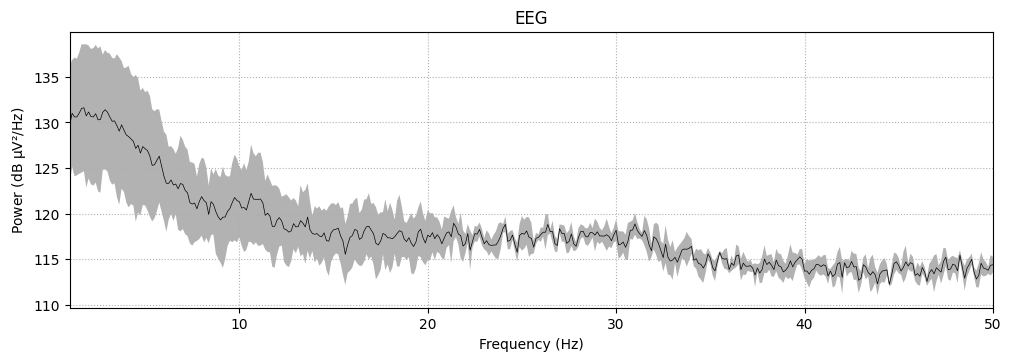

In [25]:
import mne

# Step 1: Define channel info
sfreq = 256  # Hz, Muse standard sampling rate
ch_names = ['TP9', 'AF7', 'AF8', 'TP10']
ch_types = ['eeg'] * 4

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Step 2: Create RawArray from first example
signals = parsed_data[0]['signals']  # Shape: (4, n_samples)
raw = mne.io.RawArray(signals, info)

# Step 3: Add montage (optional but good for head map visuals)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, match_case=False)

# Step 4: Plot time series and PSD
raw.plot(n_channels=4, duration=10, scalings='auto', title='Raw EEG (Muse)')

# Compute PSD with frequency limits directly
psd = raw.compute_psd(fmin=1, fmax=50)

# Plot with average over channels
psd.plot(average=True, picks='eeg', show=True)


In [31]:
# Compute PSD from epochs using new API
psd = epochs.compute_psd(method='welch', fmin=1, fmax=40)

# Get data and frequencies
psds = psd.get_data()        # shape: (n_epochs, n_channels, n_freqs)
freqs = psd.freqs            # shape: (n_freqs,)


# Take log-power (better for ML models)
X = np.log(psds)  # shape: (n_epochs, n_channels, n_freqs)
X = X.reshape(X.shape[0], -1)  # Flatten to (samples, features)

# Create labels (all events are '1' for now)
y = np.ones(X.shape[0])  # You can later map different event types


Effective window size : 1.004 (s)


In [30]:
from mne import Epochs

# Assuming parsed_data[0] is your sample subject/session
event_samples = parsed_data[0]['events']  # Sample indices where stimulus happened

# MNE expects events as shape (n_events, 3): [sample_index, 0, event_id]
events = np.array([[idx, 0, 1] for idx in event_samples])  # Using 1 as the dummy event label

# Now create epochs
epochs = Epochs(
    raw_filtered,
    events=events,
    event_id={'stimulus': 1},
    tmin=-0.2,  # 200 ms before event
    tmax=0.8,   # 800 ms after event
    baseline=(None, 0),
    preload=True
)

Not setting metadata
197 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 197 events and 257 original time points ...
0 bad epochs dropped


In [29]:
import mne

# Step 1: Setup info again (if needed)
sfreq = 256  # Muse headset sampling rate
ch_names = ['TP9', 'AF7', 'AF8', 'TP10']
ch_types = ['eeg'] * 4
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Step 2: Get signals from parsed_data (transpose to shape: channels × samples)
signals = parsed_data[0]['signals']  # Should be shape (4, N)
raw = mne.io.RawArray(signals, info)

# Step 3: Optional: add montage for plotting
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, match_case=False)

# Step 4: Filter the raw EEG
raw_filtered = raw.copy().filter(l_freq=1.0, h_freq=40.0)


Creating RawArray with float64 data, n_channels=4, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1))
scores = cross_val_score(clf, X, y, cv=5)

print(f"Cross-validated accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\reeya\EEG-ExPy\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\reeya\EEG-ExPy\venv\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\reeya\EEG-ExPy\venv\Lib\site-packages\sklearn\pipeline.py", line 661, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
    ~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\reeya\EEG-ExPy\venv\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\reeya\EEG-ExPy\venv\Lib\site-packages\sklearn\svm\_base.py", line 207, in fit
    y = self._validate_targets(y)
  File "C:\Users\reeya\EEG-ExPy\venv\Lib\site-packages\sklearn\svm\_base.py", line 751, in _validate_targets
    raise ValueError(
    ...<2 lines>...
    )
ValueError: The number of classes has to be greater than one; got 1 class


In [33]:
markers = parsed_data[0]['markers']  # This is Marker0 from the CSV
unique_markers = np.unique(markers)
print("Unique event markers:", unique_markers)


KeyError: 'markers'

In [34]:
print(parsed_data[0].keys())

dict_keys(['signals', 'timestamps', 'events'])


In [35]:
import numpy as np

# Example: assuming 'df' is your loaded CSV DataFrame
marker_col = df['Marker0'].values  # numpy array of Marker0 column

# Find indices where Marker0 is nonzero (assuming 0 means no event)
event_indices = np.where(marker_col != 0)[0]

# Extract corresponding event labels (nonzero values)
event_labels = marker_col[event_indices].astype(int)

# Create MNE-style events array: [sample_index, 0, event_label]
events = np.column_stack((event_indices, np.zeros_like(event_indices), event_labels))

print("Detected event types and counts:")
unique, counts = np.unique(event_labels, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Event {u}: {c} occurrences")


Detected event types and counts:
Event 1: 89 occurrences
Event 2: 103 occurrences


In [36]:
event_id = {str(k): k for k in np.unique(event_labels)}  # e.g. {'1': 1, '2': 2}

epochs = mne.Epochs(
    raw_filtered,
    events=events,
    event_id=event_id,
    tmin=-0.2,
    tmax=0.8,
    baseline=(None, 0),
    preload=True
)


Not setting metadata
192 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 192 events and 257 original time points ...
0 bad epochs dropped


In [38]:
psd = epochs.compute_psd(method='welch', fmin=1, fmax=40)
X = np.log(psd.get_data())
X = X.reshape(X.shape[0], -1)  # flatten for ML
y = epochs.events[:, 2]        # true labels: 1 or 2


Effective window size : 1.004 (s)


In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
scores = cross_val_score(clf, X, y, cv=5)

print(f"Cross-validated accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

Cross-validated accuracy: 0.55 ± 0.08


In [40]:
import os

base_folder = '../data/visual-N170/eegnb_examples/muse2016/'

all_files = []
for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.endswith('.csv'):
            all_files.append(os.path.join(root, file))

print(f"Found {len(all_files)} CSV files")


Found 19 CSV files


In [41]:
import os
import numpy as np
import pandas as pd
import mne
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Folder containing all CSVs
base_folder = '../data/visual-N170/eegnb_examples/muse2016/'

def load_raw_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    sfreq = 256  # typical Muse sampling frequency, adjust if needed
    
    info = mne.create_info(
        ch_names=['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'Marker0'],
        sfreq=sfreq,
        ch_types=['eeg']*4 + ['misc']*2
    )
    # Use only EEG channels for raw data
    data = df[['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'Marker0']].values.T
    
    raw = mne.io.RawArray(data, info)
    return raw, df

def extract_events(df, raw):
    markers = df['Marker0'].values
    event_samples = np.where(markers != 0)[0]
    event_ids = markers[event_samples].astype(int)
    events = np.column_stack((event_samples, np.zeros_like(event_samples), event_ids))
    
    event_id = {str(e): int(e) for e in np.unique(event_ids)}
    return events, event_id

def preprocess_and_epoch(raw, events, event_id):
    # Pick EEG channels only
    raw.pick_channels(['TP9', 'AF7', 'AF8', 'TP10'])
    
    # Filter data
    raw.filter(1., 40., fir_design='firwin', verbose=False)
    
    # Epoching parameters
    epochs = mne.Epochs(
        raw,
        events=events,
        event_id=event_id,
        tmin=-0.2,
        tmax=0.8,
        baseline=(None, 0),
        preload=True,
        verbose=False
    )
    return epochs

def extract_features(epochs):
    psd = epochs.compute_psd(method='welch', fmin=1, fmax=40, verbose=False)
    X = np.log(psd.get_data())
    X = X.reshape(X.shape[0], -1)
    y = epochs.events[:, 2]
    return X, y

# Aggregate all data
all_X = []
all_y = []

for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.endswith('.csv'):
            csv_path = os.path.join(root, file)
            print(f"Processing {csv_path} ...")
            
            raw, df = load_raw_from_csv(csv_path)
            events, event_id = extract_events(df, raw)
            if len(events) == 0:
                print("No events found, skipping file.")
                continue
            epochs = preprocess_and_epoch(raw, events, event_id)
            X, y = extract_features(epochs)
            
            all_X.append(X)
            all_y.append(y)

# Combine all data
all_X = np.vstack(all_X)
all_y = np.concatenate(all_y)

print(f"Total epochs: {all_X.shape[0]}, feature dimension: {all_X.shape[1]}")

# Train classifier
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
scores = cross_val_score(clf, all_X, all_y, cv=5)

print(f"Cross-validated accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Processing ../data/visual-N170/eegnb_examples/muse2016/subject0001\session001\data_2017-09-13-15.30.01.csv ...
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Processing ../data/visual-N170/eegnb_examples/muse2016/subject0001\session001\data_2017-09-13-15.32.50.csv ...
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Processing ../data/visual-N170/eegnb_examples/muse2016/subject0001\session001\data_2017-09-13-15.35.26.csv ...
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Processing ../data/visual-N170/eegnb_exampl

C:\Users\reeya\AppData\Local\Temp\ipykernel_512\2851822936.py:45: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(


RuntimeError: epochs._get_data() can't run because this Epochs-object is empty. You might want to check Epochs.drop_log or Epochs.plot_drop_log() to see why epochs were dropped.

In [42]:
# Make sure event_id keys are ints matching event codes
event_id = {int(k): int(k) for k in np.unique(events[:, 2])}

epochs = mne.Epochs(
    raw.pick_channels(['TP9', 'AF7', 'AF8', 'TP10']),
    events,
    event_id=event_id,
    tmin=-0.2,
    tmax=0.8,
    baseline=(None, 0),
    preload=True,
    reject_by_annotation=False,  # disable if you have annotations
    verbose=False
)
print(f"Created {len(epochs)} epochs")


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


TypeError: Event names must be an instance of str, got <class 'int'> instead.

In [43]:
# Convert event_id keys to strings (values stay int)
event_id = {str(int(k)): int(k) for k in np.unique(events[:, 2])}

# Pick EEG channels using new syntax
raw.pick(['TP9', 'AF7', 'AF8', 'TP10'])

epochs = mne.Epochs(
    raw,
    events,
    event_id=event_id,
    tmin=-0.2,
    tmax=0.8,
    baseline=(None, 0),
    preload=True,
    reject_by_annotation=False,
    verbose=False
)

print(f"Created {len(epochs)} epochs")


Created 0 epochs


C:\Users\reeya\AppData\Local\Temp\ipykernel_512\3866659731.py:7: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs = mne.Epochs(


In [44]:
print(f"Number of events: {events.shape[0]}")
print(f"Unique event IDs in events: {np.unique(events[:, 2])}")
print(f"Event IDs in event_id dict: {list(event_id.keys())}")

Number of events: 1
Unique event IDs in events: [2]
Event IDs in event_id dict: ['2']


In [45]:
for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.endswith('.csv'):
            csv_path = os.path.join(root, file)
            df = pd.read_csv(csv_path)
            markers = df['Marker0'].values
            event_samples = np.where(markers != 0)[0]
            print(f"{file}: {len(event_samples)} events")

data_2017-09-13-15.30.01.csv: 197 events
data_2017-09-13-15.32.50.csv: 195 events
data_2017-09-13-15.35.26.csv: 195 events
data_2017-09-13-15.40.17.csv: 194 events
data_2017-09-13-15.42.33.csv: 194 events
data_2017-09-13-15.45.08.csv: 199 events
data_2018-04-15-21.18.48.csv: 197 events
data_2018-04-15-21.21.20.csv: 198 events
data_2018-05-14-19.14.37.csv: 194 events
data_2018-05-14-19.38.10.csv: 196 events
data_2018-05-14-19.35.55.csv: 199 events
data_2018-05-14-19.38.10.csv: 196 events
recording_2018-05-29-20.14.04.csv: 199 events
recording_2018-05-31-16.03.39.csv: 7 events
recording_2018-06-06-14.34.14.csv: 1 events
recording_2018-06-06-15.06.45.csv: 28 events
recording_2018-06-06-14.42.27.csv: 1 events
recording_2018-06-06-14.45.33.csv: 1 events
recording_2018-06-06-18.42.19.csv: 192 events


In [46]:
min_events = 50

all_X = []
all_y = []

for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.endswith('.csv'):
            csv_path = os.path.join(root, file)
            df = pd.read_csv(csv_path)
            markers = df['Marker0'].values
            event_samples = np.where(markers != 0)[0]

            if len(event_samples) < min_events:
                print(f"Skipping {file} (only {len(event_samples)} events)")
                continue

            raw, _ = load_raw_from_csv(csv_path)
            events, event_id = extract_events(df, raw)
            # Make keys string type
            event_id = {str(int(k)): int(k) for k in np.unique(events[:, 2])}

            epochs = mne.Epochs(
                raw.pick(['TP9', 'AF7', 'AF8', 'TP10']),
                events,
                event_id=event_id,
                tmin=-0.2,
                tmax=0.8,
                baseline=(None, 0),
                preload=True,
                reject=None,
                flat=None,
                reject_by_annotation=False,
                verbose=False
            )
            if len(epochs) == 0:
                print(f"No epochs after processing {file}, skipping")
                continue

            X, y = extract_features(epochs)
            all_X.append(X)
            all_y.append(y)

all_X = np.vstack(all_X)
all_y = np.concatenate(all_y)

print(f"Total epochs collected: {all_X.shape[0]}")

clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
scores = cross_val_score(clf, all_X, all_y, cv=5)

print(f"Cross-validated accuracy: {scores.mean():.2f} ± {scores.std():.2f}")


Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=30720
    Range : 0 ... 30719 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ...   120.043 secs
Ready.
Creating RawArray with float64 data, n_channels=6, n_times=30732
    Range : 0 ... 30731 =      0.000 ..

In [53]:
import mne
import numpy as np
from scipy.integrate import simpson

def compute_band_power(epochs, bands=None):
    if bands is None:
        bands = {
            'delta': (1, 4),
            'theta': (4, 8),
            'alpha': (8, 13),
            'beta': (13, 30)
        }

    psds_obj = epochs.compute_psd(
        method="welch",  # explicitly use Welch
        fmin=1, 
        fmax=40, 
        n_fft=256,
        verbose=False
        )
    psds = psds_obj.get_data()  # shape: (n_epochs, n_channels, n_freqs)
    freqs = psds_obj.freqs
    

    psds = 10 * np.log10(psds)  # Convert to dB

    band_powers = []
    for band, (fmin, fmax) in bands.items():
        freq_mask = (freqs >= fmin) & (freqs <= fmax)
        power = simpson(psds[:, :, freq_mask], freqs[freq_mask], axis=2)
        band_powers.append(power)

    features = np.concatenate(band_powers, axis=1)  # shape: (n_epochs, n_channels * bands)
    return features

# Run this after creating `epochs` for each file
X_band = compute_band_power(epochs)
y_band = epochs.events[:, 2]

print(f"Feature shape: {X_band.shape}")


Feature shape: (191, 16)


In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf_band = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1))
scores_band = cross_val_score(clf_band, X_band, y_band, cv=5)

print(f"Band Power Classifier Accuracy: {scores_band.mean():.2f} ± {scores_band.std():.2f}")

Band Power Classifier Accuracy: 0.63 ± 0.06


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

band_names = ['delta', 'theta', 'alpha', 'beta']
channel_names = epochs.info['ch_names']
n_bands = len(band_names)
n_channels = len(channel_names)

X_df = pd.DataFrame(X_band, columns=[f'{ch}_{band}' for band in band_names for ch in channel_names])
X_df['Label'] = y_band

plt.figure(figsize=(16, 8))
for i, band in enumerate(band_names):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=X_df, x='Label', y=f'AF7_{band}')
    plt.title(f'AF7 - {band} band power per class')
plt.tight_layout()
plt.show()


In [65]:
ica = mne.preprocessing.ICA(n_components=4, random_state=42, max_iter='auto')
raw.filter(l_freq=1.0, h_freq=None)
ica.fit(raw)
#ica.plot_components()
ica.exclude = [0]  # you can try excluding 0, 1, etc., based on trial
raw_clean = ica.apply(raw.copy())

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 s)

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


Fitting ICA took 0.3s.
Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 1 ICA component
    Projecting back using 4 PCA components


In [57]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X_band, y_band, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_band.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_band)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.1)


ModuleNotFoundError: No module named 'tensorflow'

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(clf_band, X_band, y_band, cv=5)
cm = confusion_matrix(y_band, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - SVM Band Power")
plt.show()


In [60]:
import sys
print(sys.version)

3.13.4 (tags/v3.13.4:8a526ec, Jun  3 2025, 17:46:04) [MSC v.1943 64 bit (AMD64)]


In [61]:
def extract_connectivity_features(epochs):
    n_epochs = len(epochs)
    n_channels = len(epochs.ch_names)

    features = []
    for epoch in epochs.get_data():  # shape (n_channels, n_times)
        corr = np.corrcoef(epoch)
        upper_tri = corr[np.triu_indices(n_channels, k=1)]
        features.append(upper_tri)
    
    return np.array(features)

X_conn = extract_connectivity_features(epochs)
y_conn = epochs.events[:, 2]

print(f"Connectivity features shape: {X_conn.shape}")


Connectivity features shape: (191, 6)


In [62]:
clf_conn = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1))
scores_conn = cross_val_score(clf_conn, X_conn, y_conn, cv=5)

print(f"Functional Connectivity Accuracy: {scores_conn.mean():.2f} ± {scores_conn.std():.2f}")


Functional Connectivity Accuracy: 0.57 ± 0.06


In [63]:
ica.exclude = [0]  # you can try excluding 0, 1, etc., based on trial
raw_clean = ica.apply(raw.copy())

Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 1 ICA component
    Projecting back using 4 PCA components


In [66]:
from pyriemann.estimation import Covariances
from pyriemann.classification import MDM

covs = Covariances().fit_transform(epochs.get_data())
clf_riemann = MDM()
scores_riemann = cross_val_score(clf_riemann, covs, y_band, cv=5)

print(f"Riemannian classifier accuracy: {scores_riemann.mean():.2f} ± {scores_riemann.std():.2f}")

Riemannian classifier accuracy: 0.48 ± 0.02


In [67]:
from sklearn.preprocessing import StandardScaler

# Ensure everything is numpy arrays and properly shaped
X_combined = np.concatenate([X_band, X_conn, covs.reshape(covs.shape[0], -1)], axis=1)
X_combined = StandardScaler().fit_transform(X_combined)
y_combined = y_band  # All feature sets use same labels

print(f"Combined feature shape: {X_combined.shape}")


Combined feature shape: (191, 38)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define model
class EEGNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(EEGNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = EEGNet(input_dim=X_combined.shape[1], hidden_dim=64, output_dim=len(np.unique(y_combined)))

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 50

# Training loop
for epoch in range(epochs):
    model.train()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor).argmax(dim=1).numpy()
    acc = accuracy_score(y_test, preds)
    print(f"PyTorch NN Accuracy: {acc:.2f}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - PyTorch NN")
plt.show()


In [ ]:
import numpy as np
unique, counts = np.unique(y_combined, return_counts=True)
for label, count in zip(unique, counts):
    print(f"Class {label}: {count} samples")


In [73]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Suppose 'raw' is your MNE Raw object with Muse data
# Define channel names
ch_names = ['TP9', 'AF7', 'AF8', 'TP10']

# Define approximate 3D positions, z=0 for 2D scalp map
montage_positions = {
    'TP9': [-0.05, -0.05, 0.0],
    'AF7': [-0.03,  0.05, 0.0],
    'AF8': [ 0.03,  0.05, 0.0],
    'TP10':[ 0.05, -0.05, 0.0]
}

# Create DigMontage object
montage = mne.channels.DigMontage(pos=montage_positions, coord_frame='head')

# Assign montage to your raw object (example: raw)
raw.set_montage(montage)

# Compute PSD in alpha band 8-12 Hz
psd, freqs = mne.time_frequency.psd_welch(raw, picks=ch_names, fmin=8, fmax=12)
band_power = psd.mean(axis=1)  # average power per channel

# Plot topomap
mne.viz.plot_topomap(band_power, montage.get_pos2d(), show=True)
plt.title("Alpha Band Power Topomap")
plt.show()



TypeError: DigMontage.__init__() got an unexpected keyword argument 'pos'

In [74]:
import mne
print(mne.__version__)

1.9.0


In [ ]:
# Calculate band power for one band, e.g., alpha (8-12 Hz)
psd, freqs = mne.time_frequency.psd_welch(raw, fmin=8, fmax=12, picks=ch_names)
band_power = psd.mean(axis=1)  # average power per channel

# Plot topomap
mne.viz.plot_topomap(band_power, pos=montage.get_pos2d(), show=True)


In [ ]:
from sklearn.inspection import permutation_importance

# Assuming clf is your trained sklearn pipeline (SVM or similar)
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

importances = result.importances_mean
for i, imp in enumerate(importances):
    print(f"Feature {i}: Importance {imp:.4f}")


In [ ]:
import torch.nn as nn

window_length_samples = 250  # 1 second at 250Hz

def segment_data(raw, window_length):
    data = raw.get_data(picks=ch_names)  # shape (channels, total_samples)
    n_windows = data.shape[1] // window_length
    windows = np.array([
        data[:, i*window_length:(i+1)*window_length]
        for i in range(n_windows)
    ])  # shape (n_windows, channels, window_length)
    return windows

from torch.utils.data import Dataset, DataLoader
import torch

class EEGDataset(Dataset):
    def __init__(self, windows, labels):
        self.windows = torch.tensor(windows, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.windows)

    def __getitem__(self, idx):
        return self.windows[idx], self.labels[idx]

train_dataset = EEGDataset(X_train_windows, y_train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = EEGDataset(X_test_windows, y_test_labels)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



class SimpleEEGCNN(nn.Module):
    def __init__(self, n_channels=4, n_classes=2):
        super(SimpleEEGCNN, self).__init__()
        self.conv1 = nn.Conv1d(n_channels, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(16)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(2)
        
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(32)
        
        self.fc1 = nn.Linear(32 * input_length // 4, 64)  # input_length depends on your window size
        self.fc2 = nn.Linear(64, n_classes)
    
    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

import torch.optim as optim
from sklearn.metrics import accuracy_score

model = SimpleEEGCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training (one epoch example)
model.train()
for X_batch, y_batch in train_loader:
    optimizer.zero_grad()
    outputs = model(X_batch)
    loss = criterion(outputs, y_batch)
    loss.backward()
    optimizer.step()

# Evaluation
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())

acc = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {acc:.2f}")

